In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt

import missingno

In [2]:
data = pd.read_pickle('../pickles/clean_training_data')

In [3]:
data.head()

,WELL,DEPTH_MD,CALI,RDEP,RMED,DRHO,GR,RHOB,NPHI,PEF,...,FORCE_2020_LITHOFACIES_LITHOLOGY,95_PERC,05_PERC,GR_NORM,VSHALE,BS_FIX,CALI_R_MEAN,BS_FROM_CALI,BS_COMB,DIFF_CAL
0,15/9-13,494.528,19.480835,1.798681,1.611410,-0.574928,80.200851,1.884186,NaN,20.915468,...,2,101.287117,14.6615,112.004200,0.756582,NaN,NaN,17.5,17.5,1.980835
1,15/9-13,494.680,19.468800,1.795641,1.618070,-0.570188,79.262886,1.889794,NaN,19.383013,...,2,101.287117,14.6615,111.128597,0.745754,NaN,NaN,17.5,17.5,1.968800
2,15/9-13,494.832,19.468800,1.800733,1.626459,-0.574245,74.821999,1.896523,NaN,22.591518,...,2,101.287117,14.6615,106.982973,0.694489,NaN,NaN,17.5,17.5,1.968800
3,15/9-13,494.984,19.459282,1.801517,1.621594,-0.586315,72.878922,1.891913,NaN,32.191910,...,2,101.287117,14.6615,105.169086,0.672058,NaN,NaN,17.5,17.5,1.959282
4,15/9-13,495.136,19.453100,1.795299,1.602679,-0.597914,71.729141,1.880034,NaN,38.495632,...,2,101.287117,14.6615,104.095752,0.658785,NaN,NaN,17.5,17.5,1.953100


In [105]:
workingdf = data.loc[:, ['Z_LOC', 'RHOB', 'DIFF_CAL', 'GR_NORM', 'VSHALE', 'DTC', 'NPHI']]

In [39]:
workingdf.head()

,Z_LOC,RHOB,DIFF_CAL,GR_NORM,VSHALE,DTC
0,-469.501831,1.884186,1.980835,112.004200,0.756582,161.131180
1,-469.653809,1.889794,1.968800,111.128597,0.745754,160.603470
2,-469.805786,1.896523,1.968800,106.982973,0.694489,160.173615
3,-469.957794,1.891913,1.959282,105.169086,0.672058,160.149429
4,-470.109772,1.880034,1.953100,104.095752,0.658785,160.128342


In [40]:
workingdf['TVD']= workingdf['Z_LOC'] * -1

In [41]:
workingdf

,Z_LOC,RHOB,DIFF_CAL,GR_NORM,VSHALE,DTC,TVD
0,-469.501831,1.884186,1.980835,112.004200,0.756582,161.131180,469.501831
1,-469.653809,1.889794,1.968800,111.128597,0.745754,160.603470,469.653809
2,-469.805786,1.896523,1.968800,106.982973,0.694489,160.173615,469.805786
3,-469.957794,1.891913,1.959282,105.169086,0.672058,160.149429,469.957794
4,-470.109772,1.880034,1.953100,104.095752,0.658785,160.128342,470.109772
...,...,...,...,...,...,...,...
1170506,NaN,2.527984,-0.076830,68.082822,0.213445,NaN,NaN
1170507,NaN,2.537613,-0.120756,67.302549,0.203796,NaN,NaN
1170508,NaN,2.491860,-0.149752,64.267543,0.166264,NaN,NaN
1170509,NaN,2.447539,-0.186221,60.634149,0.121333,NaN,NaN


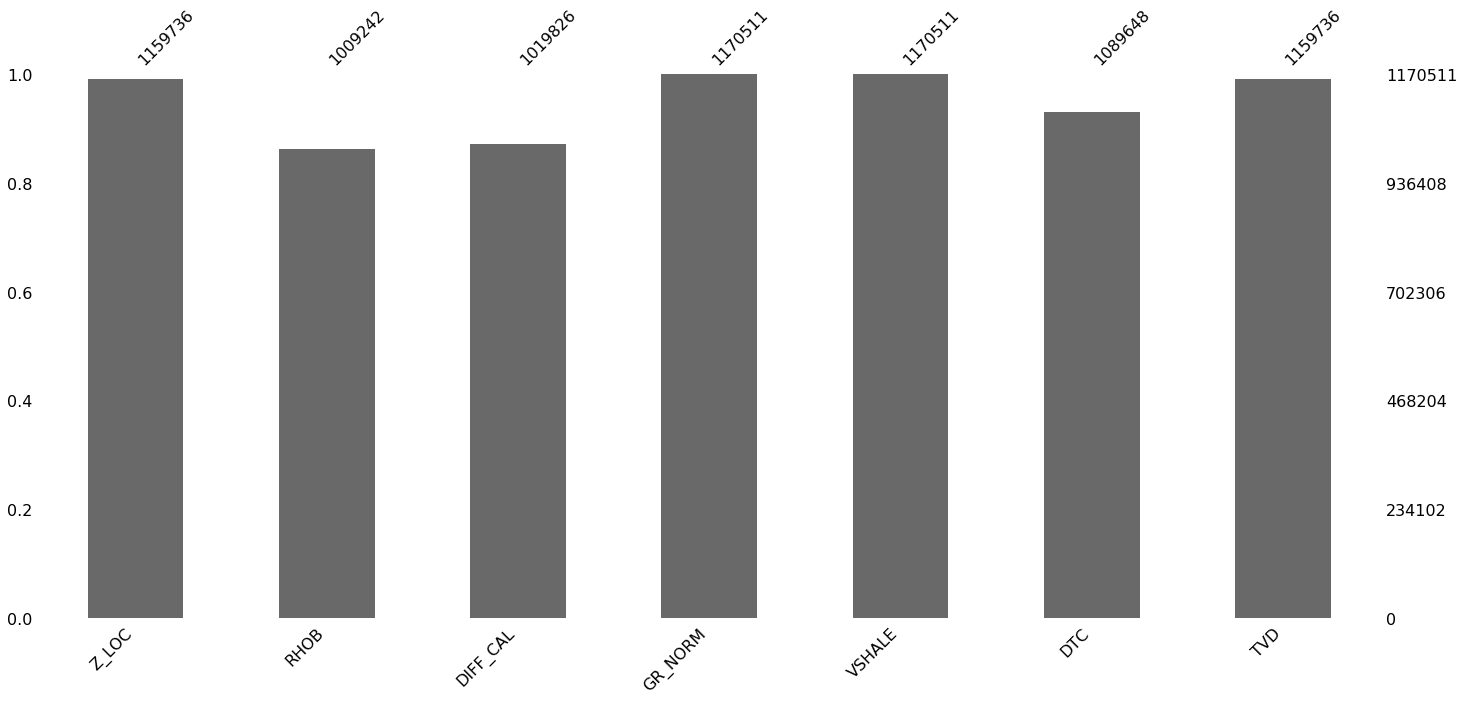

In [42]:
missingno.bar(workingdf)

In [43]:
workingdf['TVD'].fillna(method='bfill', inplace=True)
workingdf['TVD'].fillna(method='ffill', inplace=True)

In [44]:
workingdf['DTC'].fillna(method='ffill', inplace=True)

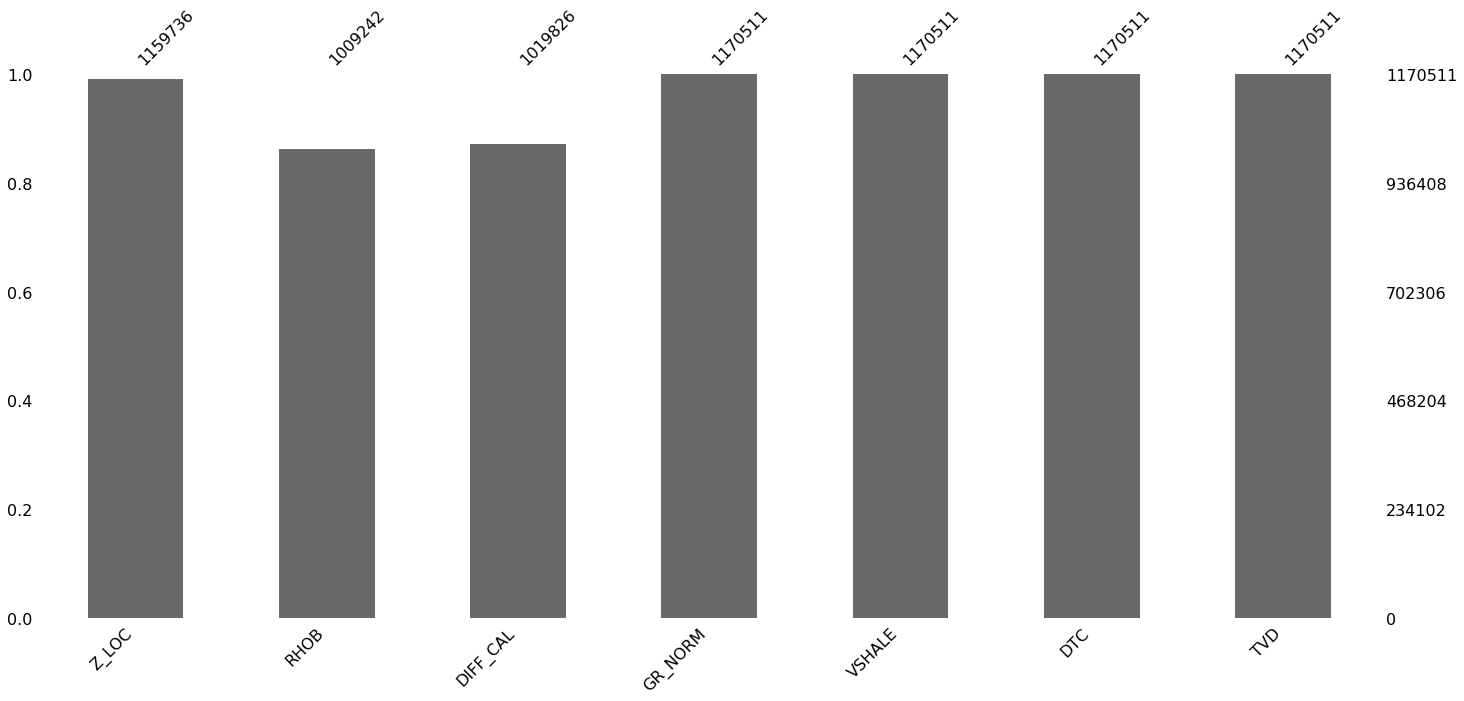

In [45]:
missingno.bar(workingdf)

In [46]:
workingdf_dropped_nan = workingdf.copy()

In [47]:
workingdf_dropped_nan = workingdf_dropped_nan.dropna()

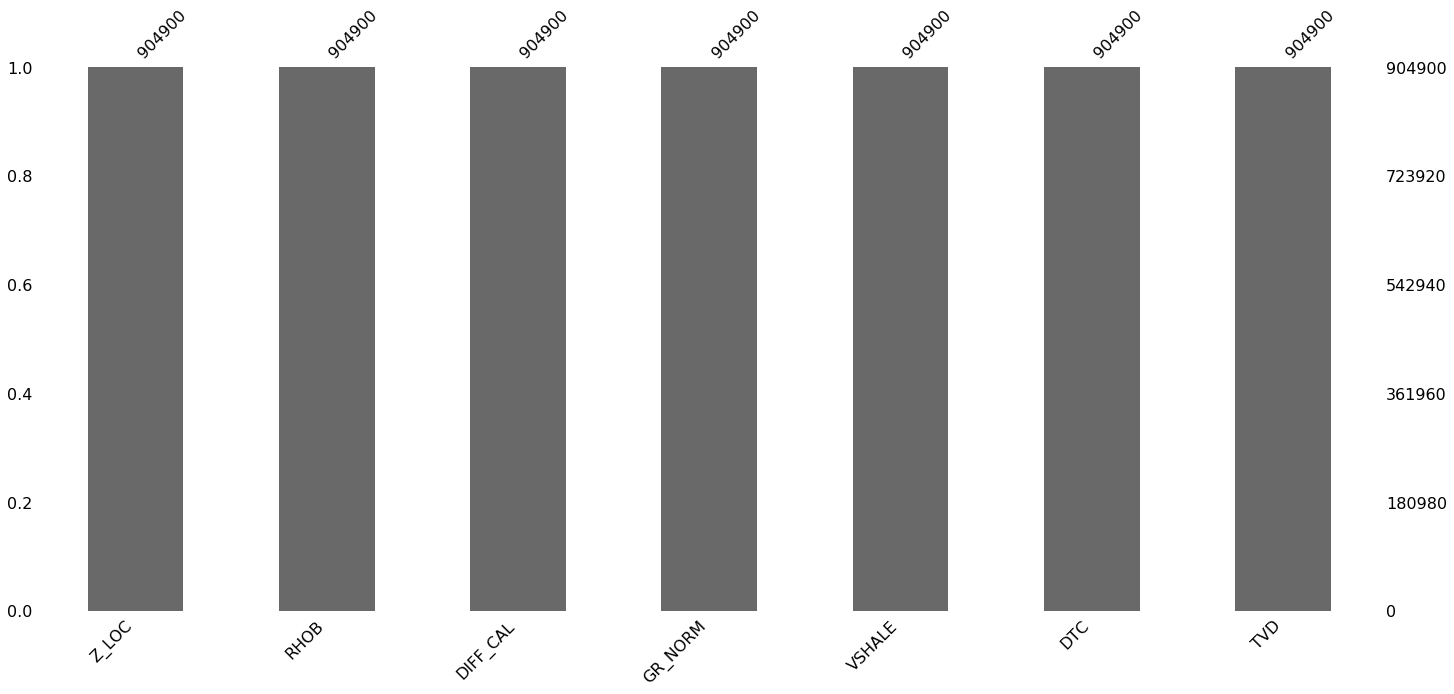

In [48]:
missingno.bar(workingdf_dropped_nan)

In [49]:
workingdf_dropped_nan = workingdf_dropped_nan.drop(workingdf_dropped_nan['DIFF_CAL'] <= 2)

KeyError: '[ True  True  True ...  True  True  True] not found in axis'

In [ ]:
workingdf_dropped_nan = workingdf_dropped_nan[workingdf_dropped_nan['DIFF_CAL'] <= 2]

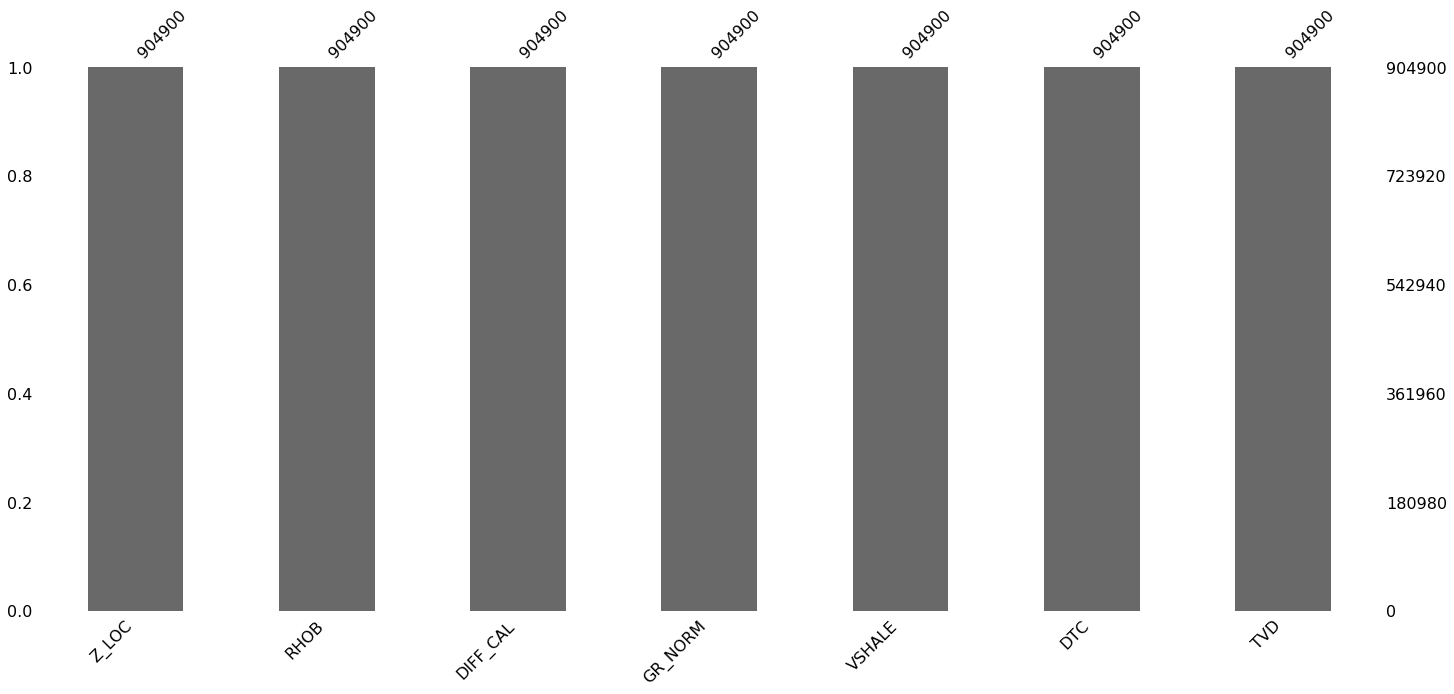

In [50]:
missingno.bar(workingdf_dropped_nan)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
temp = workingdf_dropped_nan.loc[:,['VSHALE', 'DTC', 'TVD', 'RHOB']]

In [53]:
modellingdf = temp.copy()

In [54]:
col_names = ['DTC', 'TVD', 'VSHALE']
features = modellingdf[col_names]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [55]:
features

array([[ 1.79357069, -1.93487384,  0.94940203],
       [ 1.77553873, -1.93471158,  0.91282956],
       [ 1.76085048, -1.93454932,  0.73967367],
       ...,
       [-0.3240162 ,  0.88165215, -1.09005324],
       [-0.3240162 ,  0.88181454, -1.28254998],
       [-0.3240162 ,  0.88197667, -1.42692344]])

In [56]:
modellingdf[col_names]= features

In [57]:
modellingdf

,VSHALE,DTC,TVD,RHOB
0,0.949402,1.793571,-1.934874,1.884186
1,0.912830,1.775539,-1.934712,1.889794
2,0.739674,1.760850,-1.934549,1.896523
3,0.663911,1.760024,-1.934387,1.891913
4,0.619079,1.759303,-1.934225,1.880034
...,...,...,...,...
1170498,-1.264846,-0.324016,0.881328,2.417872
1170499,-1.087372,-0.324016,0.881490,2.408293
1170500,-1.090053,-0.324016,0.881652,2.397462
1170501,-1.282550,-0.324016,0.881815,2.383679


In [58]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor

In [59]:
X = modellingdf.loc[:,['VSHALE', 'DTC', 'TVD']]
y = modellingdf.loc[:,'RHOB']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((633430, 3), (271470, 3), (633430,), (271470,))

In [62]:
model_LR=LinearRegression()

In [63]:
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y_pred_LR_test = model_LR.predict(X_test)

(0, 3.5)

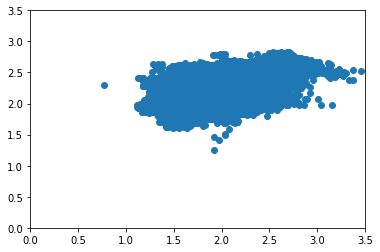

In [65]:
plt.scatter(y_test, y_pred_LR_test)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

In [66]:
model_RFR = RandomForestRegressor(max_depth=200)
model_RFR.fit(X_train, y_train)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [67]:
y_pred_RFR_test = model_RFR.predict(X_test)

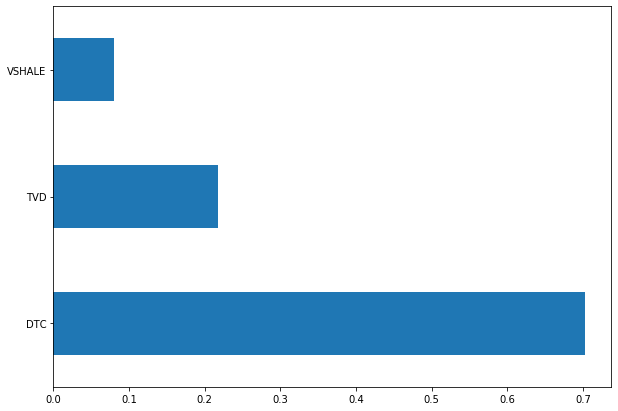

In [68]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

(0, 3.5)

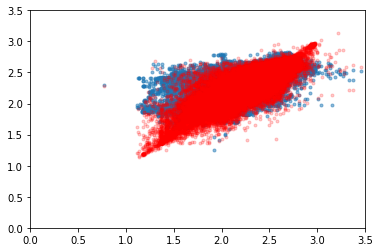

In [69]:
plt.scatter(y_test, y_pred_LR_test, marker='.', alpha=0.5)
plt.scatter(y_test, y_pred_RFR_test, color='red', marker='.', alpha=0.2)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

RFR Without Scaler

In [199]:
X_nonscal = workingdf_dropped_nan.loc[:,['VSHALE', 'DTC', 'TVD']]
y_nonscal = workingdf_dropped_nan.loc[:,'RHOB']

In [200]:
X_nonscal

,VSHALE,DTC,TVD
0,0.756582,161.131180,469.501831
1,0.745754,160.603470,469.653809
2,0.694489,160.173615,469.805786
3,0.672058,160.149429,469.957794
4,0.658785,160.128342,470.109772
...,...,...,...
1170498,0.101022,99.159462,3107.236816
1170499,0.153565,99.159462,3107.388672
1170500,0.152772,99.159462,3107.540771
1170501,0.095780,99.159462,3107.692871


In [201]:
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
model_RFR_NS = RandomForestRegressor(max_depth=200)
model_RFR_NS.fit(X_train_ns, y_train_ns)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [204]:
y_pred_RFR_NS_test = model_RFR.predict(X_test_ns)

In [206]:
print(f'RMSE on Test Data for LR: {mean_squared_error(y_test, y_pred_LR_test)**0.5}')
print(f'RMSE on Test Data for RFR: {mean_squared_error(y_test, y_pred_RFR_test)**0.5}')
print(f'RMSE on Test Data for XGBR: {mean_squared_error(y_test, y_pred_XGBR_test)**0.5}')
print(f'RMSE on Test Data for RFR_NS: {mean_squared_error(y_test_ns, y_pred_RFR_NS_test)**0.5}')

RMSE on Test Data for LR: 0.12362932607570071
RMSE on Test Data for RFR: 0.08114450881302587
RMSE on Test Data for XGBR: 0.10860862088941099
RMSE on Test Data for RFR_NS: 0.5361026740384133


# XGB Regressor

In [123]:
model_XGBR = XGBRegressor()
model_XGBR.fit(X_train, y_train)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [124]:
y_pred_XGBR_test = model_XGBR.predict(X_test)

(0, 3.5)

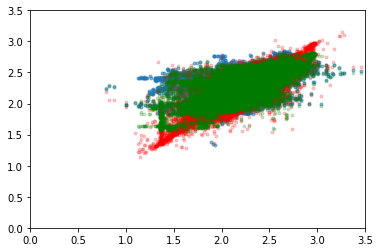

In [125]:
plt.scatter(y_test, y_pred_LR_test, marker='.', alpha=0.5)
plt.scatter(y_test, y_pred_RFR_test, color='red', marker='.', alpha=0.2)
plt.scatter(y_test, y_pred_XGBR_test, color='green', marker='.', alpha=0.2)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

(0, 3.5)

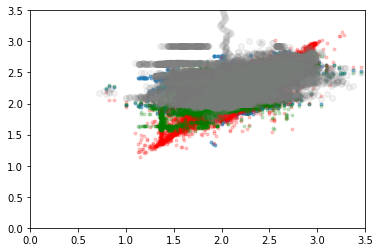

In [139]:
plt.scatter(y_test, y_pred_LR_test, marker='.', alpha=0.5)
plt.scatter(y_test, y_pred_RFR_test, color='red', marker='.', alpha=0.2)
plt.scatter(y_test, y_pred_XGBR_test, color='green', marker='.', alpha=0.2)
plt.scatter(temp['RHOB'], temp['RHOB_GARD'], color='grey', alpha=0.1)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

In [138]:
print(f'RMSE on Test Data for LR: {mean_squared_error(y_test, y_pred_LR_test)**0.5}')
print(f'RMSE on Test Data for RFR: {mean_squared_error(y_test, y_pred_RFR_test)**0.5}')
print(f'RMSE on Test Data for XGBR: {mean_squared_error(y_test, y_pred_XGBR_test)**0.5}')

RMSE on Test Data for LR: 0.12362932607570071
RMSE on Test Data for RFR: 0.08114450881302587
RMSE on Test Data for XGBR: 0.10860862088941099


In [128]:
# Gardner Equation
def gardners_equation_rhob(curve):
    """Simplified Gardners Equation

    Parameters
    ----------
    curve :
        Compressional Slowness

    Returns
    -------
    float
        Computed RHOB from Gardner's Equation
    """
    a_metric = 0.31 #m/s
    a_imperial = 0.23 #ft/s
    b = 0.25
    
    vp = 1000000 / curve 
    rhob = a_imperial * (vp** b)

    return rhob

In [134]:
temp['RHOB_GARD'] = temp.apply(lambda x: gardners_equation_rhob(x.loc['DTC']), axis=1)

In [135]:
temp

,VSHALE,DTC,TVD,RHOB,RHOB_GARD
0,0.756582,161.131180,469.501831,1.884186,2.041423
1,0.745754,160.603470,469.653809,1.889794,2.043098
2,0.694489,160.173615,469.805786,1.896523,2.044467
3,0.672058,160.149429,469.957794,1.891913,2.044544
4,0.658785,160.128342,470.109772,1.880034,2.044611
...,...,...,...,...,...
1170498,0.101022,99.159462,3107.236816,2.417872,2.304859
1170499,0.153565,99.159462,3107.388672,2.408293,2.304859
1170500,0.152772,99.159462,3107.540771,2.397462,2.304859
1170501,0.095780,99.159462,3107.692871,2.383679,2.304859


# Final RHOB Prediction

**RandomForestRegressor appears to perform the best out of the ones tested**  
  
  Lets attempt to build a synthetic RHOB and Fix the existing one

In [70]:
workingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 7 columns):
Z_LOC       1159736 non-null float64
RHOB        1009242 non-null float64
DIFF_CAL    1019826 non-null float64
GR_NORM     1170511 non-null float64
VSHALE      1170511 non-null float64
DTC         1170511 non-null float64
TVD         1170511 non-null float64
dtypes: float64(7)
memory usage: 62.5 MB


In [71]:
X_full = workingdf.loc[:,['VSHALE', 'DTC', 'TVD', 'RHOB']].copy()

In [72]:
X_full

,VSHALE,DTC,TVD,RHOB
0,0.756582,161.131180,469.501831,1.884186
1,0.745754,160.603470,469.653809,1.889794
2,0.694489,160.173615,469.805786,1.896523
3,0.672058,160.149429,469.957794,1.891913
4,0.658785,160.128342,470.109772,1.880034
...,...,...,...,...
1170506,0.213445,99.159462,3107.844727,2.527984
1170507,0.203796,99.159462,3107.844727,2.537613
1170508,0.166264,99.159462,3107.844727,2.491860
1170509,0.121333,99.159462,3107.844727,2.447539


In [73]:
col_names = ['DTC', 'TVD', 'VSHALE']
features = X_full[col_names]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [74]:
X_full[col_names]= features

In [75]:
X_full

,VSHALE,DTC,TVD,RHOB
0,0.946636,1.621236,-1.693966,1.884186
1,0.910147,1.603939,-1.693811,1.889794
2,0.737387,1.589850,-1.693655,1.896523
3,0.661797,1.589057,-1.693500,1.891913
4,0.617068,1.588366,-1.693344,1.880034
...,...,...,...,...
1170506,-0.883695,-0.410024,1.006090,2.527984
1170507,-0.916211,-0.410024,1.006090,2.537613
1170508,-1.042689,-0.410024,1.006090,2.491860
1170509,-1.194103,-0.410024,1.006090,2.447539


In [76]:
X_features = X_full.loc[:,['VSHALE', 'DTC', 'TVD']]

In [77]:
full_rhob_pred = model_RFR.predict(X_features)

In [78]:
X_full['RHOB_SYNTH'] = full_rhob_pred

In [79]:
X_full

,VSHALE,DTC,TVD,RHOB,RHOB_SYNTH
0,0.946636,1.621236,-1.693966,1.884186,2.027840
1,0.910147,1.603939,-1.693811,1.889794,2.043292
2,0.737387,1.589850,-1.693655,1.896523,2.063121
3,0.661797,1.589057,-1.693500,1.891913,2.072366
4,0.617068,1.588366,-1.693344,1.880034,2.072366
...,...,...,...,...,...
1170506,-0.883695,-0.410024,1.006090,2.527984,2.546154
1170507,-0.916211,-0.410024,1.006090,2.537613,2.512992
1170508,-1.042689,-0.410024,1.006090,2.491860,2.542477
1170509,-1.194103,-0.410024,1.006090,2.447539,2.493705


(0, 3.5)

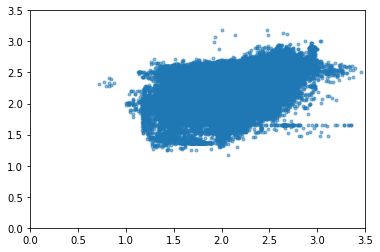

In [80]:
plt.scatter(X_full['RHOB'], X_full['RHOB_SYNTH'], marker='.', alpha=0.5)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

In [81]:
X_features

,VSHALE,DTC,TVD
0,0.946636,1.621236,-1.693966
1,0.910147,1.603939,-1.693811
2,0.737387,1.589850,-1.693655
3,0.661797,1.589057,-1.693500
4,0.617068,1.588366,-1.693344
...,...,...,...
1170506,-0.883695,-0.410024,1.006090
1170507,-0.916211,-0.410024,1.006090
1170508,-1.042689,-0.410024,1.006090
1170509,-1.194103,-0.410024,1.006090


In [110]:
workingdf['RHOB_SYNTH'] = full_rhob_pred

In [83]:
workingdf

,Z_LOC,RHOB,DIFF_CAL,GR_NORM,VSHALE,DTC,TVD,RHOB_SYNTH
0,-469.501831,1.884186,1.980835,112.004200,0.756582,161.131180,469.501831,2.027840
1,-469.653809,1.889794,1.968800,111.128597,0.745754,160.603470,469.653809,2.043292
2,-469.805786,1.896523,1.968800,106.982973,0.694489,160.173615,469.805786,2.063121
3,-469.957794,1.891913,1.959282,105.169086,0.672058,160.149429,469.957794,2.072366
4,-470.109772,1.880034,1.953100,104.095752,0.658785,160.128342,470.109772,2.072366
...,...,...,...,...,...,...,...,...
1170506,NaN,2.527984,-0.076830,68.082822,0.213445,99.159462,3107.844727,2.546154
1170507,NaN,2.537613,-0.120756,67.302549,0.203796,99.159462,3107.844727,2.512992
1170508,NaN,2.491860,-0.149752,64.267543,0.166264,99.159462,3107.844727,2.542477
1170509,NaN,2.447539,-0.186221,60.634149,0.121333,99.159462,3107.844727,2.493705


(0, 3.5)

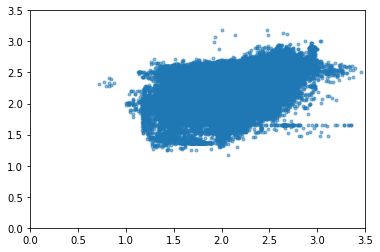

In [84]:
plt.scatter(workingdf['RHOB'], workingdf['RHOB_SYNTH'], marker='.', alpha=0.5)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

In [111]:
workingdf['RHOB_COMBINED'] = workingdf['RHOB']


In [112]:
workingdf.loc[workingdf.DIFF_CAL > 3, "RHOB_COMBINED"]=workingdf['RHOB_SYNTH']

In [113]:
workingdf

,Z_LOC,RHOB,DIFF_CAL,GR_NORM,VSHALE,DTC,NPHI,RHOB_SYNTH,RHOB_COMBINED
0,-469.501831,1.884186,1.980835,112.004200,0.756582,161.131180,NaN,2.027840,1.884186
1,-469.653809,1.889794,1.968800,111.128597,0.745754,160.603470,NaN,2.043292,1.889794
2,-469.805786,1.896523,1.968800,106.982973,0.694489,160.173615,NaN,2.063121,1.896523
3,-469.957794,1.891913,1.959282,105.169086,0.672058,160.149429,NaN,2.072366,1.891913
4,-470.109772,1.880034,1.953100,104.095752,0.658785,160.128342,NaN,2.072366,1.880034
...,...,...,...,...,...,...,...,...,...
1170506,NaN,2.527984,-0.076830,68.082822,0.213445,NaN,NaN,2.546154,2.527984
1170507,NaN,2.537613,-0.120756,67.302549,0.203796,NaN,NaN,2.512992,2.537613
1170508,NaN,2.491860,-0.149752,64.267543,0.166264,NaN,NaN,2.542477,2.491860
1170509,NaN,2.447539,-0.186221,60.634149,0.121333,NaN,NaN,2.493705,2.447539


(0, 3.5)

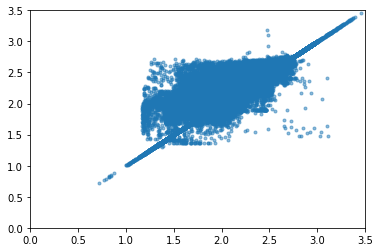

In [114]:
plt.scatter(workingdf['RHOB'], workingdf['RHOB_COMBINED'], marker='.', alpha=0.5)
plt.xlim(0,3.5)
plt.ylim(0,3.5)

In [115]:
workingdf.describe()

,Z_LOC,RHOB,DIFF_CAL,GR_NORM,VSHALE,DTC,NPHI,RHOB_SYNTH,RHOB_COMBINED
count,1.159736e+06,1.009242e+06,1.019826e+06,1.170511e+06,1.170511e+06,1.089648e+06,765409.000000,1.170511e+06,1.016050e+06
mean,-2.138527e+03,2.284987e+00,5.921446e-01,9.006886e+01,4.756745e-01,1.133581e+02,0.331966,2.287566e+00,2.289783e+00
std,9.709426e+02,2.532835e-01,1.392644e+00,2.806785e+01,2.967426e-01,2.999050e+01,0.130483,2.278301e-01,2.459329e-01
min,-5.395563e+03,7.209712e-01,-8.694515e+00,-3.858309e+01,0.000000e+00,7.415132e+00,-0.035822,1.168775e+00,7.209712e-01
25%,-2.811502e+03,2.092203e+00,-2.457237e-02,6.992794e+01,2.362615e-01,8.782584e+01,0.241365,2.095651e+00,2.097046e+00
50%,-2.042785e+03,2.321228e+00,2.447357e-01,8.782064e+01,4.575248e-01,1.095852e+02,0.326800,2.314483e+00,2.322315e+00
75%,-1.391866e+03,2.488580e+00,8.052783e-01,1.087333e+02,7.161328e-01,1.407745e+02,0.422951,2.478578e+00,2.488682e+00
max,-1.110860e+02,3.457820e+00,1.913762e+01,1.136846e+03,1.000000e+00,3.204789e+02,0.999570,3.180276e+00,3.457820e+00


In [143]:
import pickle

In [259]:
pickle.dump(model_RFR, open('RHOB_RFR_model.pkl', 'wb'))

In [260]:
test_load = pickle.load(open('RHOB_RFR_model.pkl', 'rb'))

In [261]:
test_load

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# NPHI Prediction

In [116]:
nphi_working = workingdf.loc[:,['VSHALE', 'DTC', 'Z_LOC', 'RHOB_COMBINED', 'NPHI']]

In [117]:
nphi_working['TVD']= nphi_working['Z_LOC'] * -1

In [118]:
nphi_working.describe()

,VSHALE,DTC,Z_LOC,RHOB_COMBINED,NPHI,TVD
count,1.170511e+06,1.089648e+06,1.159736e+06,1.016050e+06,765409.000000,1.159736e+06
mean,4.756745e-01,1.133581e+02,-2.138527e+03,2.289783e+00,0.331966,2.138527e+03
std,2.967426e-01,2.999050e+01,9.709426e+02,2.459329e-01,0.130483,9.709426e+02
min,0.000000e+00,7.415132e+00,-5.395563e+03,7.209712e-01,-0.035822,1.110860e+02
25%,2.362615e-01,8.782584e+01,-2.811502e+03,2.097046e+00,0.241365,1.391866e+03
50%,4.575248e-01,1.095852e+02,-2.042785e+03,2.322315e+00,0.326800,2.042785e+03
75%,7.161328e-01,1.407745e+02,-1.391866e+03,2.488682e+00,0.422951,2.811502e+03
max,1.000000e+00,3.204789e+02,-1.110860e+02,3.457820e+00,0.999570,5.395563e+03


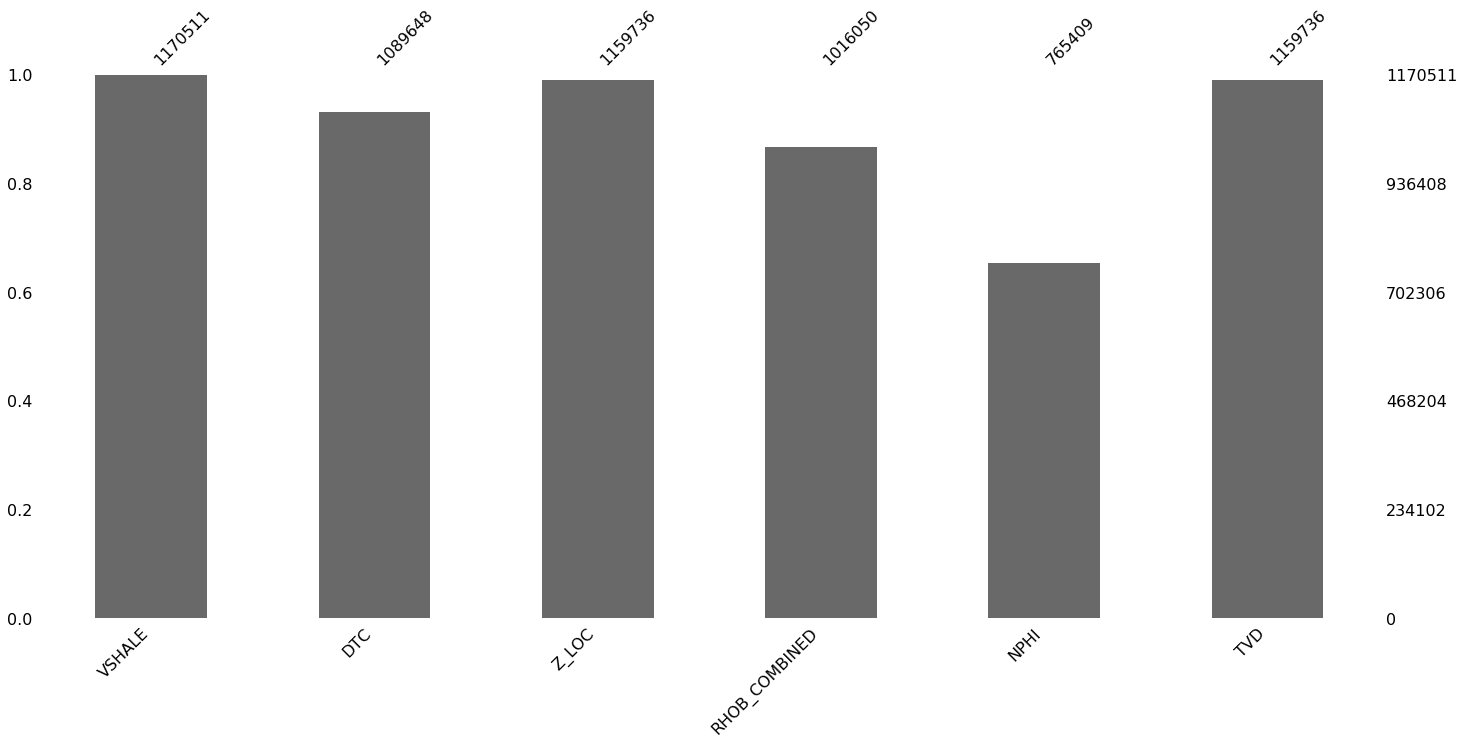

In [119]:
missingno.bar(nphi_working)

In [120]:
nphi_working['TVD'].fillna(method='bfill', inplace=True)
nphi_working['TVD'].fillna(method='ffill', inplace=True)

In [121]:
nphi_working['DTC'].fillna(method='ffill', inplace=True)

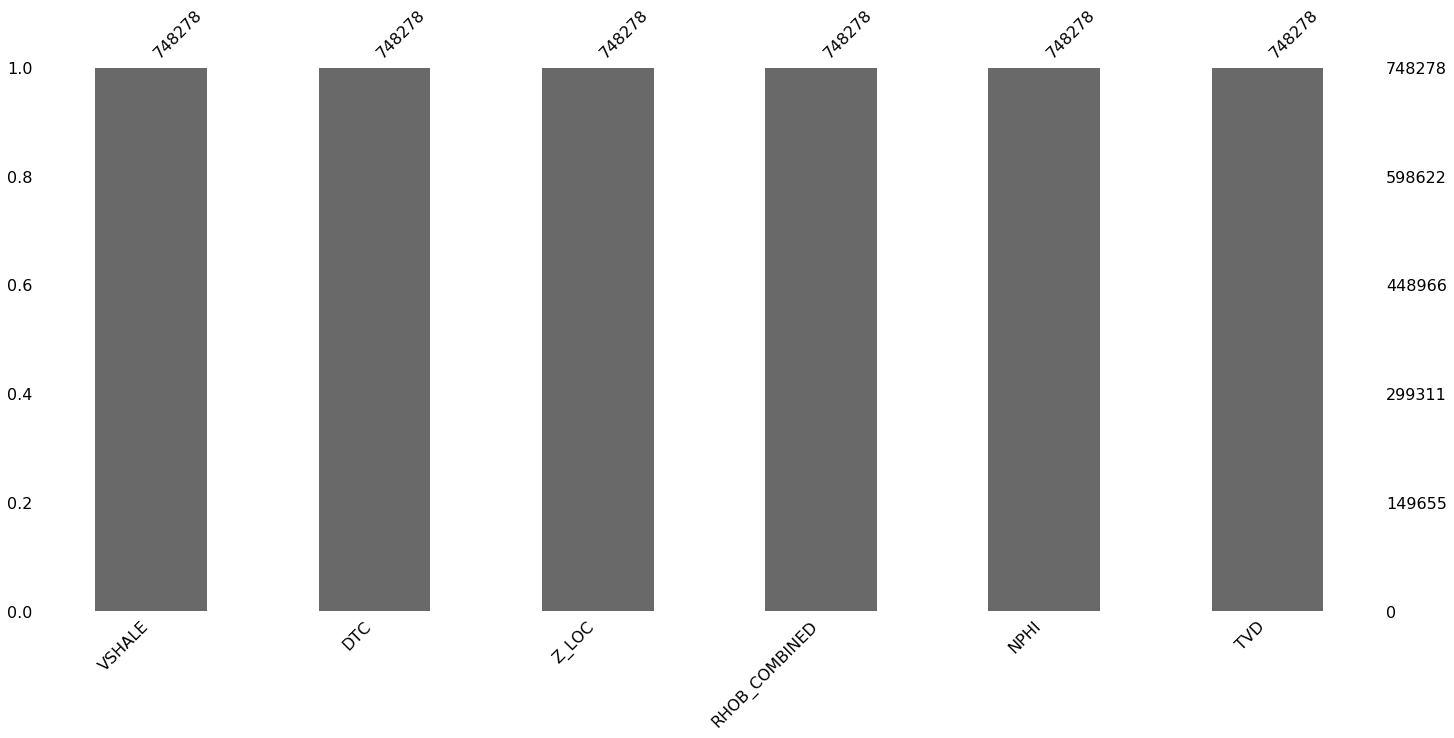

In [125]:
missingno.bar(nphi_working)

In [123]:
nphi_working.dropna(inplace=True)

In [126]:
nphimodeldf = nphi_working.copy()

In [127]:
col_names = ['DTC', 'TVD', 'VSHALE', 'RHOB_COMBINED']
features = nphi_working[col_names]
scaler=StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [128]:
features

array([[ 1.54655492, -1.39989584, -0.09458061, -2.48585208],
       [ 1.35186657, -1.39973305,  0.09500625, -2.3695988 ],
       [ 1.20468455, -1.39957013,  0.13973143, -2.29590315],
       ...,
       [-0.19068684,  0.73350581, -1.25119675,  0.36811028],
       [-0.19068684,  0.73366847, -1.3461702 ,  0.20891506],
       [-0.19068684,  0.73383138, -1.45025882,  0.11528492]])

In [129]:
nphimodeldf[col_names] = features

In [130]:
nphimodeldf.describe()

,VSHALE,DTC,Z_LOC,RHOB_COMBINED,NPHI,TVD
count,7.482780e+05,7.482780e+05,748278.000000,7.482780e+05,748278.000000,7.482780e+05
mean,-5.469526e-18,1.094817e-15,-2420.607277,-5.589400e-15,0.331900,8.429148e-16
std,1.000001e+00,1.000001e+00,933.607145,1.000001e+00,0.130252,1.000001e+00
min,-1.646668e+00,-3.464884e+00,-5395.563477,-7.132712e+00,-0.035822,-2.304510e+00
25%,-8.254671e-01,-7.781373e-01,-3030.406555,-7.397928e-01,0.240679,-7.360196e-01
50%,-1.020314e-02,-2.710655e-01,-2364.203613,1.812659e-01,0.326814,-6.041481e-02
75%,8.402699e-01,7.893703e-01,-1733.454559,7.909435e-01,0.423425,6.531652e-01
max,1.614221e+00,7.707823e+00,-269.101532,4.525735e+00,0.999570,3.186520e+00


In [131]:
X_nphi_LR = nphimodeldf.loc[:,['VSHALE', 'DTC', 'TVD', 'RHOB_COMBINED']]
y_nphi_LR = nphimodeldf.loc[:,'NPHI']

In [132]:
X_train_NPHI_LR, X_test_NPHI_LR, y_train_NPHI_LR, y_test_NPHI_LR = train_test_split(X_nphi_LR, y_nphi_LR, test_size=0.3, random_state=42)

In [133]:
model_NPHI_LR=LinearRegression()

In [134]:
model_NPHI_LR.fit(X_train_NPHI_LR, y_train_NPHI_LR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
y_pred_NPHI_LR_test = model_NPHI_LR.predict(X_test_NPHI_LR)

(0, 1)

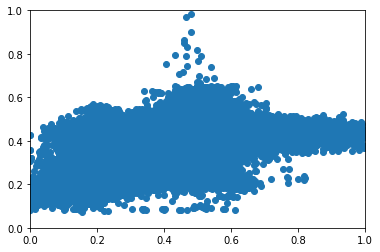

In [136]:
plt.scatter(y_test_NPHI_LR, y_pred_NPHI_LR_test)
plt.xlim(0,1)
plt.ylim(0,1)

In [137]:
model_NPHI_RFR = RandomForestRegressor(max_depth=200)
model_NPHI_RFR.fit(X_train_NPHI_LR, y_train_NPHI_LR)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [138]:
y_pred_NPHI_RFR_test = model_NPHI_RFR.predict(X_test_NPHI_LR)

(0, 1)

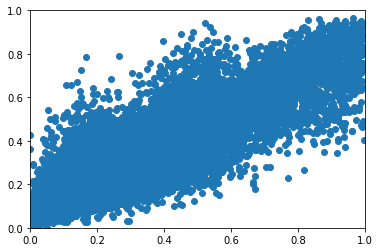

In [139]:
plt.scatter(y_test_NPHI_LR, y_pred_NPHI_RFR_test)
plt.xlim(0,1)
plt.ylim(0,1)

In [140]:
model_NPHI_XGBR = XGBRegressor()
model_NPHI_XGBR.fit(X_train_NPHI_LR, y_train_NPHI_LR)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [141]:
y_pred_NPHI_XGBR_test = model_NPHI_XGBR.predict(X_test_NPHI_LR)

(0, 1)

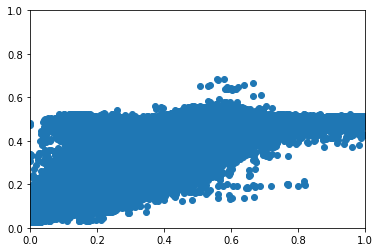

In [142]:
plt.scatter(y_test_NPHI_LR, y_pred_NPHI_XGBR_test)
plt.xlim(0,1)
plt.ylim(0,1)

In [144]:
pickle.dump(model_NPHI_RFR, open('NPHI_RFR_model.pkl', 'wb'))

SVR Takes too much time

In [338]:
from sklearn.svm import SVR

In [ ]:
model_NPHI_SVRRBF = SVR(kernel='rbf')
model_NPHI_SVRRBF.fit(X_train_NPHI_LR, y_train_NPHI_LR)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_pred_NPHI_SVRRBF_test = model_NPHI_SVRRBF.predict(X_test_NPHI_LR)

In [337]:
print(f'RMSE on Test Data for LR: {mean_squared_error(y_test_NPHI_LR, y_pred_NPHI_LR_test)**0.5}')
print(f'RMSE on Test Data for RFR: {mean_squared_error(y_test_NPHI_LR, y_pred_NPHI_RFR_test)**0.5}')
print(f'RMSE on Test Data for XGBR: {mean_squared_error(y_test, y_pred_NPHI_XGBR_test)**0.5}')

RMSE on Test Data for LR: 0.0791957808582979
RMSE on Test Data for RFR: 0.04583753664601979
RMSE on Test Data for XGBR: 0.0692709140757742
